#### Loading the dataset

In [33]:
import gdown

# The file ID from the Google Drive link
file_id = "1ejyQe12TIHjOHj6oT5dxHVwcwap41TuV"
url = f"https://drive.google.com/uc?id={file_id}"
output = "/tmp/Face_Mask.zip"

# Download the file
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1ejyQe12TIHjOHj6oT5dxHVwcwap41TuV
From (redirected): https://drive.google.com/uc?id=1ejyQe12TIHjOHj6oT5dxHVwcwap41TuV&confirm=t&uuid=bb6bf53b-0a47-40f6-a8e3-832ac23c06f0
To: /tmp/Face_Mask.zip
100%|██████████| 346M/346M [00:05<00:00, 66.1MB/s] 


'/tmp/Face_Mask.zip'

In [39]:
import zipfile

local_zip = '/tmp/Face_Mask.zip'
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/tmp')


In [44]:
base_dir = '/tmp/Face Mask Dataset'#see from the extracted and then do
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir,'Test')
# Directory with our training mask pictures
train_mask_dir = os.path.join(train_dir, 'WithMask')#withmask and all are folder names from the extracted ones

# Directory with our training without_masks pictures
train_without_mask_dir = os.path.join(train_dir, 'WithoutMask')

# Directory with our validation mask pictures
validation_mask_dir = os.path.join(validation_dir, 'WithMask')

# Directory with our validation without_masks pictures
validation_without_mask_dir = os.path.join(validation_dir, 'WithoutMask')

#Directory with our tests masks and without masks pictures
test_mask_dir = os.path.join(test_dir,'WithMask')
test_without_mask_dir = os.path.join(test_dir,'WithoutMask')

In [45]:
print("Contents of /tmp directory:", os.listdir("/tmp"))



Contents of /tmp directory: ['tmpoj4r_ond', 'Face Mask Dataset', 'kaggle.log', 'cats_and_dogs_filtered', 'cats_and_dogs_filtered.zip', 'Face_Mask.zip', 'hsperfdata_root', 'jax', 'tmppn8f48vb', 'clean-layer.sh', 'yarn--1718259988260-0.08321594358742646', 'v8-compile-cache-0', 'package_list', 'yarn--1718259995929-0.6710047446011926', 'yarn--1718259842433-0.3949823598729896', 'yarn--1718259841469-0.525546751866067', 'core-js-banners', 'yarn--1718259989234-0.969785157261071', 'yarn--1718259848960-0.36776961217575965']


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)#rescale does is to 255 to 0 to 1 normalize
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(28, 28),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'  # Set to grayscale
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (28,28),
    batch_size = 32,
    class_mode = 'binary',
    color_mode = 'grayscale'
)


Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [47]:
train_mask_fnames = os.listdir(train_mask_dir)
print(train_mask_fnames[:10])

train_without_masks_fnames = os.listdir(train_without_mask_dir)
train_without_masks_fnames.sort()
print(train_without_mask_dir[:10])

['Augmented_891_7390311.png', 'Augmented_343_2513306.png', 'Augmented_339_7201865.png', 'Augmented_622_2881641.png', 'Augmented_280_4770161.png', 'Augmented_378_6069987.png', 'Augmented_490_7861335.png', 'Augmented_703_419892.png', 'Augmented_447_6057545.png', 'Augmented_477_2830784.png']
/tmp/Face 


In [49]:
im = mpimg.imread(os.path.join(train_mask_dir, train_mask_fnames[0]))
im.shape

(224, 224, 3)

#### Defining LeNet architecture

In [50]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
lenetcnn = Sequential()
lenetcnn.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh',padding="same",input_shape=(28,28,1)))
lenetcnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
lenetcnn.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh',padding='valid'))
lenetcnn.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding='valid'))
lenetcnn.add(Flatten())
lenetcnn.add(Dense(120, activation='tanh'))
lenetcnn.add(Dense(84, activation='tanh'))
lenetcnn.add(Dense(1, activation='sigmoid'))
lenetcnn.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,941 (238.05 KB)

 Trainable params: 60,941 (238.05 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
lenetcnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:

history = lenetcnn.fit(train_generator, epochs=25, validation_data=val_generator)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.8144 - loss: 0.3720 - val_accuracy: 0.9300 - val_loss: 0.1873
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9561 - loss: 0.1181 - val_accuracy: 0.9625 - val_loss: 0.1149
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9707 - loss: 0.0874 - val_accuracy: 0.9638 - val_loss: 0.0932
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9723 - loss: 0.0761 - val_accuracy: 0.9712 - val_loss: 0.1069
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9733 - loss: 0.0693 - val_accuracy: 0.9725 - val_loss: 0.0888
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.9839 - loss: 0.0486 - val_accuracy: 0.9625 - val_loss: 0.1230
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9820 - loss: 0.0514 - val_accuracy: 0.9663 - val_loss: 0.1059
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9818 - loss: 0.0435 - 

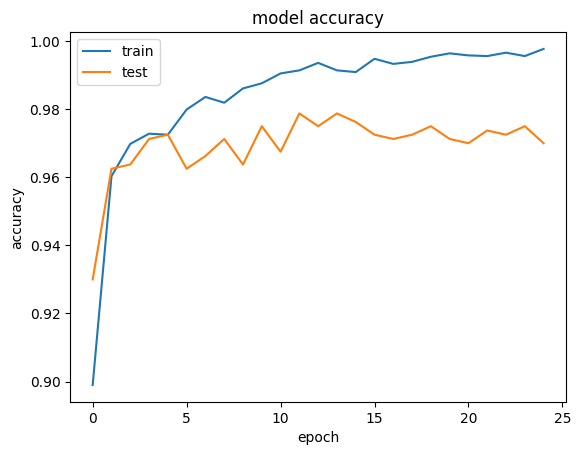

In [53]:
#plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

##### Defining AlexNet architecture

In [54]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227,227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

alexnet = Sequential()
alexnet.add(Conv2D(96, kernel_size=(11, 11), strides=4,
                   padding='valid', activation='relu',
                   input_shape=(227, 227, 3),
                   kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))
alexnet.add(Conv2D(256, kernel_size=(5, 5), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))
alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))

alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(Conv2D(384, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(Conv2D(256, kernel_size=(3, 3), strides=1,
                   padding='same', activation='relu',
                   kernel_initializer='he_normal'))

alexnet.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2),
                         padding='valid'))

alexnet.add(Flatten())
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(4096, activation='relu'))
alexnet.add(Dense(1000, activation='relu'))
alexnet.add(Dense(1, activation='sigmoid')) 

alexnet.summary()

optimizer = SGD(learning_rate=0.01, momentum=0.9) 
alexnet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │         1,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,379,345 (237.96 MB)

 Trainable params: 62,379,345 (237.96 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = alexnet.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 430ms/step - accuracy: 0.9507 - loss: 0.1499 - val_accuracy: 0.9513 - val_loss: 0.1421
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 429ms/step - accuracy: 0.9396 - loss: 0.1761 - val_accuracy: 0.9550 - val_loss: 0.1530
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 430ms/step - accuracy: 0.9543 - loss: 0.1365 - val_accuracy: 0.9700 - val_loss: 0.0987
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 427ms/step - accuracy: 0.9573 - loss: 0.1335 - val_accuracy: 0.9625 - val_loss: 0.1194
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 430ms/step - accuracy: 0.9586 - loss: 0.1224 - val_accuracy: 0.9737 - val_loss: 0.0975
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 431ms/step - accuracy: 0.9614 - loss: 0.1091 - val_accuracy: 0.9787 - val_loss: 0.0808
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 428ms/step - accuracy: 0.9682 - loss: 0.0903 - val_accuracy: 0.9862 - val_loss: 0.0545
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 430ms/step - accuracy: 0.9730 -

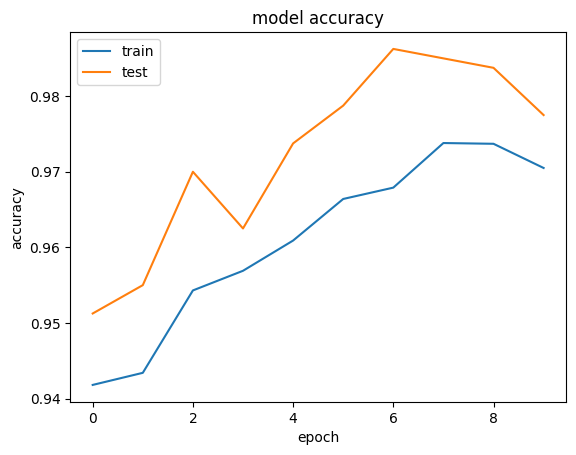

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


#### Running Pre-trained models on the same dataset

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,InceptionV3,ResNet50,EfficientNetB0,MobileNetV2

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)#rescale does is to 255 to 0 to 1 normalize
test_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), 
    batch_size=20,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), 
    batch_size=20,
    class_mode='binary'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224), 
    batch_size=20,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [68]:
# training all the models..
models = [VGG16,InceptionV3,ResNet50,EfficientNetB0,MobileNetV2]

results = []
evaluation = []
def train_models(models):
  
  for model in models:
    base_model = model(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    name = model.__name__
    print(f"Model being trained is {name} \n")
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    # train only the top layers (which were randomly initialized)
    for layer in base_model.layers:
      layer.trainable = False

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    history = model.fit(train_generator,epochs=3,validation_data=val_generator)

    #plotting the loss and accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    print("plots for model")
    fig,ax = plt.subplots(2,1,figsize=(10,10))
    ax[0].plot(acc,label='Training Accuracy')
    ax[0].plot(val_acc,label='Validation Accuracy')
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(loc='lower right')
    ax[0].set_title('Training and Validation Accuracy')
    ax[1].plot(loss,label='Training Loss')
    ax[1].plot(val_loss,label='Validation Loss')
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Loss")
    ax[1].legend(loc='upper right')
    ax[1].set_title('Training and Validation Loss')
    plt.show()

    #evaluating the model
    results.append({'model':name,'accuracy':history.history['accuracy'][-1],'val_accuracy':history.history['val_accuracy'][-1],'loss':history.history['loss'][-1],'val_loss':history.history['val_loss'][-1]})
    evaluation.append({'model':name,'evaluation':model.evaluate(test_generator)})


Model being trained is VGG16 

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 61s 116ms/step - accuracy: 0.9301 - loss: 0.1754 - val_accuracy: 0.9613 - val_loss: 0.1280
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 57s 112ms/step - accuracy: 0.9790 - loss: 0.0516 - val_accuracy: 0.9875 - val_loss: 0.0421
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - accuracy: 0.9846 - loss: 0.0438 - val_accuracy: 0.9787 - val_loss: 0.0501
plots for model


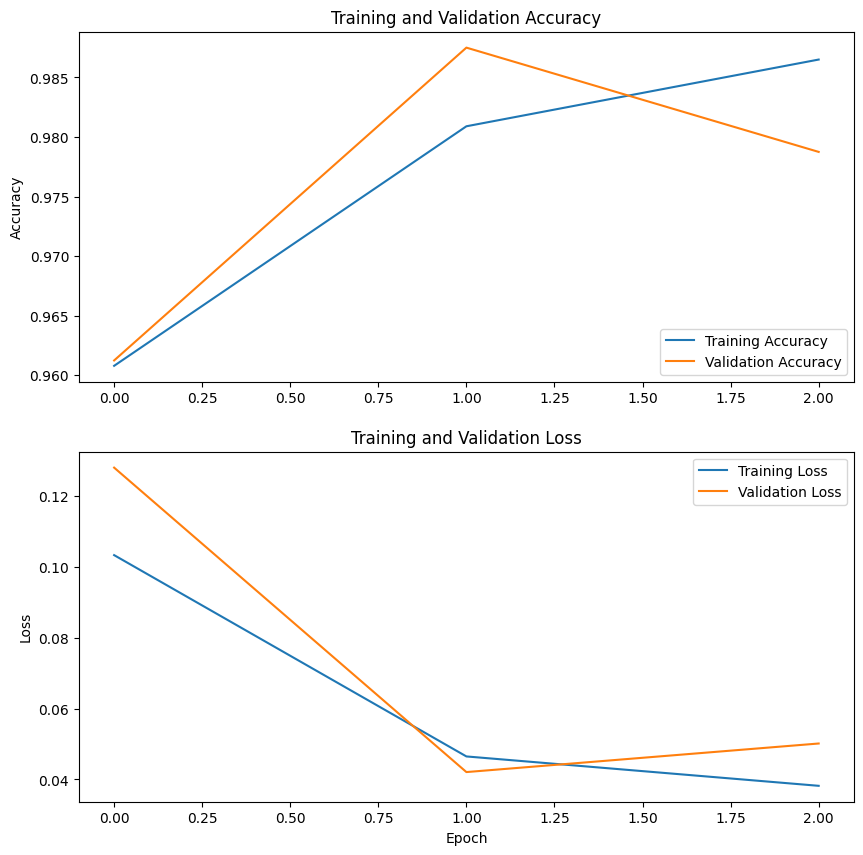

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9725 - loss: 0.0594
Model being trained is InceptionV3 

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - accuracy: 0.9792 - loss: 0.0762 - val_accuracy: 0.9962 - val_loss: 0.0177
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.9973 - loss: 0.0119 - val_accuracy: 1.0000 - val_loss: 5.9201e-04
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.9972 - loss: 0.0100 - val_accuracy: 1.0000 - val_loss: 8.3407e-04
plots for model


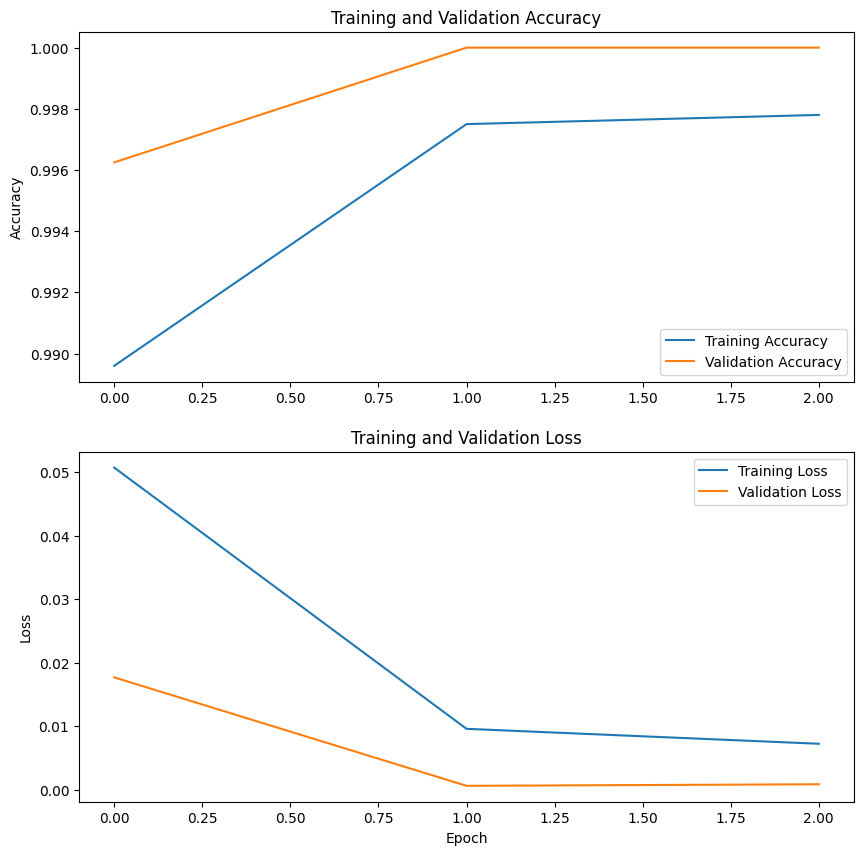

50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 1.0000 - loss: 8.8084e-04
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Model being trained is ResNet50 

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 66ms/step - accuracy: 0.6153 - loss: 0.7166 - val_accuracy: 0.6787 - val_loss: 0.5487
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.7754 - loss: 0.4686 - val_accuracy: 0.8200 - val_loss: 0.4163
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 29s 58ms/step - accuracy: 0.8132 - loss: 0.4168 - val_accuracy: 0.7563 - val_loss: 0.4543
plots for model


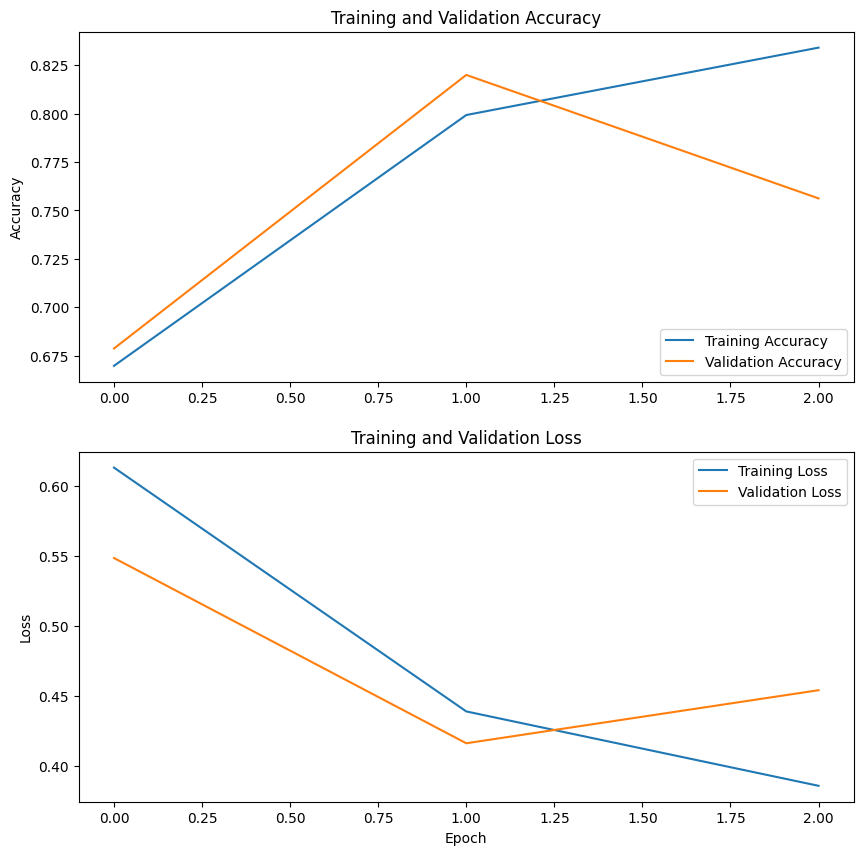

50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.7767 - loss: 0.4318
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Model being trained is EfficientNetB0 

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 50s 46ms/step - accuracy: 0.4954 - loss: 0.6995 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 35ms/step - accuracy: 0.4915 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.5027 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
plots for model


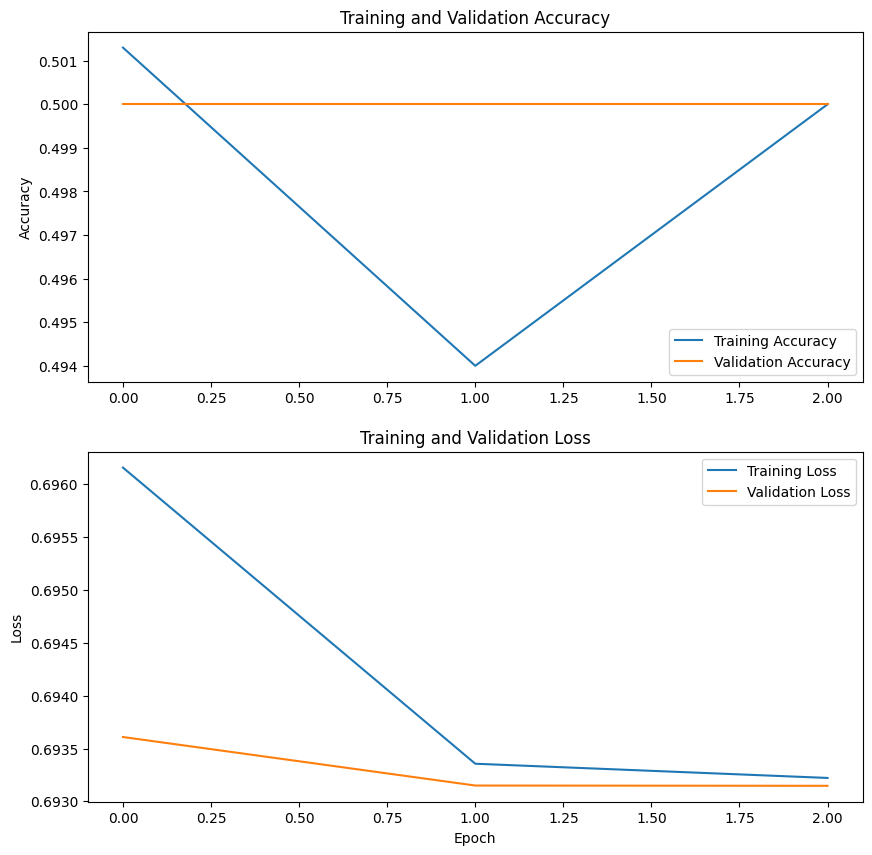

50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.5238 - loss: 0.6931
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Model being trained is MobileNetV2 

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.9753 - loss: 0.0784 - val_accuracy: 0.9887 - val_loss: 0.0334
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9924 - loss: 0.0193 - val_accuracy: 0.9950 - val_loss: 0.0128
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9925 - val_loss: 0.0257
plots for model


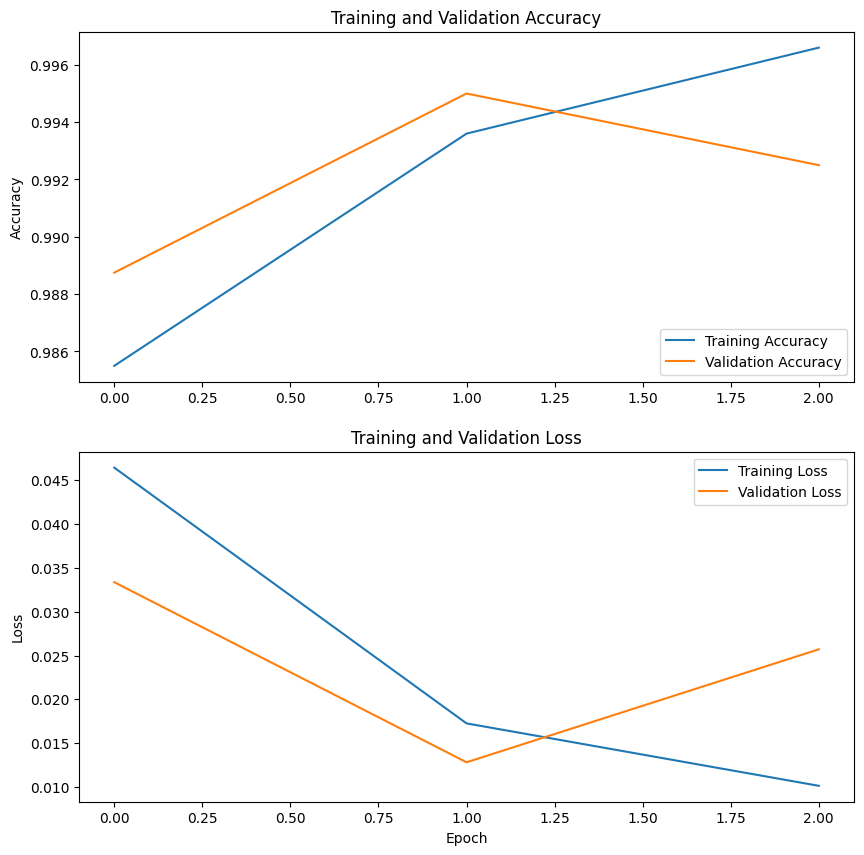

50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9935 - loss: 0.0230


In [69]:
train_models(models)

In [70]:
results = pd.DataFrame(results)
results

,model,accuracy,val_accuracy,loss,val_loss
0,VGG16,0.9865,0.97875,0.038192,0.050131
1,InceptionV3,0.9978,1.00000,0.007220,0.000834
2,ResNet50,0.8341,0.75625,0.385916,0.454255
3,EfficientNetB0,0.5000,0.50000,0.693222,0.693147
4,MobileNetV2,0.9966,0.99250,0.010126,0.025706


In [71]:
evaluation = pd.DataFrame(evaluation)
evaluation

,model,evaluation
0,VGG16,"[0.06189379096031189, 0.9737903475761414]"
1,InceptionV3,"[0.0013672115746885538, 1.0]"
2,ResNet50,"[0.43340039253234863, 0.7671371102333069]"
3,EfficientNetB0,"[0.693142831325531, 0.5131048560142517]"
4,MobileNetV2,"[0.03129220008850098, 0.9919354915618896]"


### conclusion: 
- InceptionV3 demonstrates outstanding performance with the lowest loss and perfect accuracy, making it the most effective model among the evaluated options.